In [41]:
import bilby
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from gwpy.signal.filter_design import bandpass, concatenate_zpks, notch

In [48]:
sampling_frequency = 4096
duration = 4.0
minimum_frequency = 20

In [49]:
injection_parameters = dict(
    mass_1=36., 
    mass_2=29.,
    a_1=0.4, 
    a_2=0.3, 
    tilt_1=0.5, 
    tilt_2=1.0, 
    phi_12=1.7, 
    phi_jl=0.3,
    luminosity_distance=2000., 
    theta_jn=0.4, 
    psi=2.659,
    phase=1.3, 
    geocent_time=1126259642.413, 
    ra=1.375, 
    dec=-1.2108
    )

waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2", #Where in the source code are the lists of approximants specified?
    reference_frequency=20.0,
    minimum_frequency=minimum_frequency,
)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole, #Where in the source code references the available time domain source models 
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)


12:27 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [50]:
H1 = bilby.gw.detector.get_empty_interferometer('H1')

In [51]:
H1.set_strain_data_from_power_spectral_density(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)


In [52]:
H1.inject_signal_from_waveform_generator(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

12:27 bilby INFO    : Injected signal in H1:
12:27 bilby INFO    :   optimal SNR = 11.76
12:27 bilby INFO    :   matched filter SNR = 12.69-0.54j
12:27 bilby INFO    :   mass_1 = 36.0
12:27 bilby INFO    :   mass_2 = 29.0
12:27 bilby INFO    :   a_1 = 0.4
12:27 bilby INFO    :   a_2 = 0.3
12:27 bilby INFO    :   tilt_1 = 0.5
12:27 bilby INFO    :   tilt_2 = 1.0
12:27 bilby INFO    :   phi_12 = 1.7
12:27 bilby INFO    :   phi_jl = 0.3
12:27 bilby INFO    :   luminosity_distance = 2000.0
12:27 bilby INFO    :   theta_jn = 0.4
12:27 bilby INFO    :   psi = 2.659
12:27 bilby INFO    :   phase = 1.3
12:27 bilby INFO    :   geocent_time = 1126259642.413
12:27 bilby INFO    :   ra = 1.375
12:27 bilby INFO    :   dec = -1.2108


{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
 'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}

In [53]:
H1_timeseries = TimeSeries(
            data=H1.strain_data.time_domain_strain, times=H1.strain_data.time_array)

zpks = []
bandpass_frequencies = (50,250)

zpks.append(bandpass(
                bandpass_frequencies[0], bandpass_frequencies[1],
                H1.strain_data.sampling_frequency))

zpk = concatenate_zpks(*zpks)

H1_strain = H1_timeseries.filter(zpk, filtfilt=False)


16384

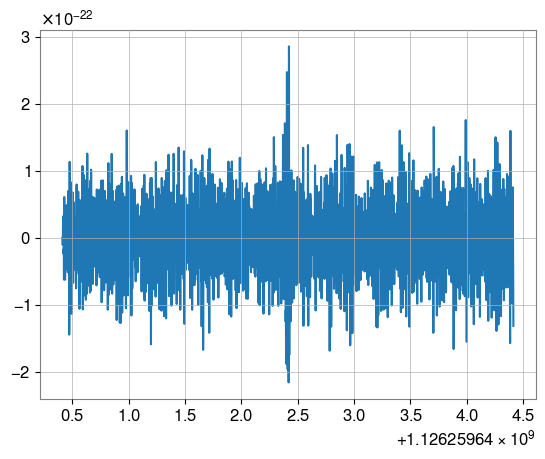

In [35]:
plt.plot(H1_strain)

In [54]:
qspecgram = H1_strain.q_transform()

/home/ethanmillar/gravwaves/lib/python3.10/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


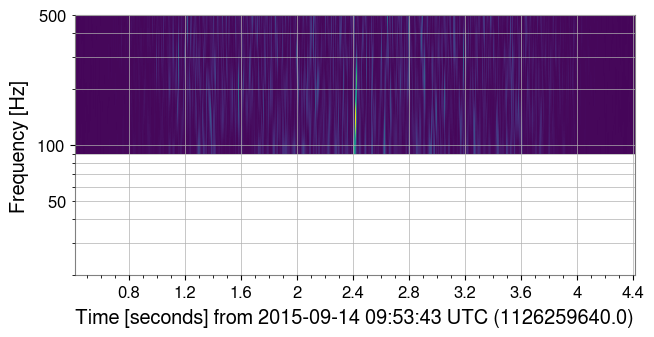

In [55]:
plot = qspecgram.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
#ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()